In [1]:
#Importing required packages

import matplotlib.pyplot as plt
import scipy as sp
import astropy as ap
import numpy as np

<h2> M3 and M13 CMDs

In [2]:
#Reading M3 text file

M3 = np.loadtxt("my_ngc5272hstvvi.txt"[:])
M3_mag = M3[:,0]         #First column is the color for M3
M3_color = M3[:,1]       #Second column is the magnitude for M3

#Reading M13 text file

M13 = np.loadtxt("my_ngc6205hstvvi.txt"[:])
M13_mag = M13[:,0]       #First column is the color for M13
M13_color = M13[:,1]     #Second column is the magnitude for M13

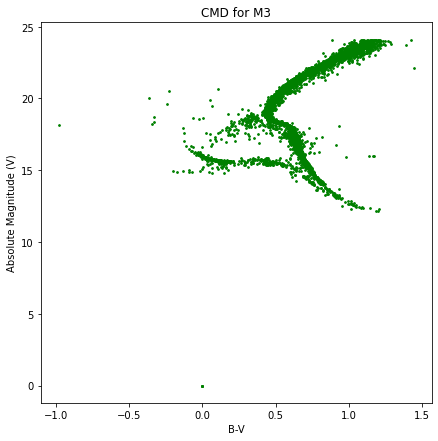

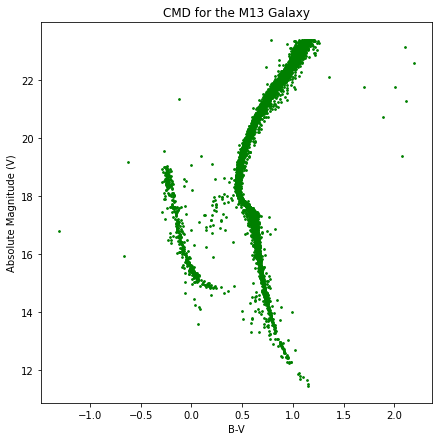

In [3]:
#Plotting CMD for M3

plt.figure(figsize=(7,7))
plt.title('CMD for M3')
plt.xlabel('B-V')
plt.ylabel('Absolute Magnitude (V)')
plt.scatter(M3_color,M3_mag,color='g',s=3)

#Plotting CMD for M13

plt.figure(figsize=(7,7))
plt.title('CMD for the M13 Galaxy')
plt.xlabel('B-V')
plt.ylabel('Absolute Magnitude (V)')
plt.scatter(M13_color,M13_mag,color='g',s=3)

<h2> Finding the Apparent Distance Moduli Using the Theoretical ZAHB

In [4]:
#Reading ZAHB text file

ZAHB = np.loadtxt("theoretical_ZAHB.txt"[:])
ZAHB_mag = ZAHB[:,7]        #ZAHB magnitude
ZAHB_color = ZAHB[:,8]      #ZAHB color

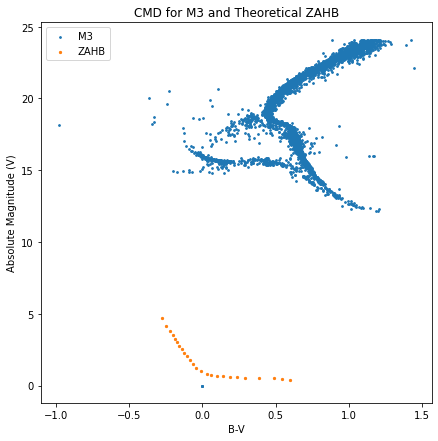

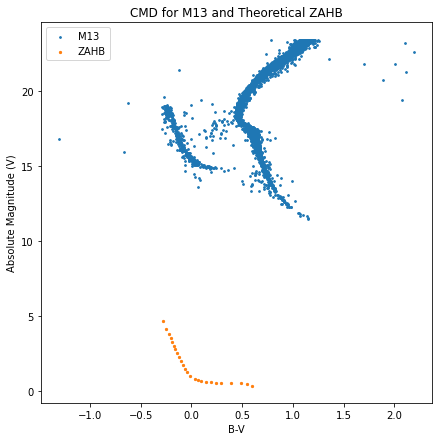

In [5]:
#Plotting theoretical ZAHB and CMD for M3

plt.figure(figsize=(7,7))
plt.title('CMD for M3 and Theoretical ZAHB')
plt.xlabel('B-V')
plt.ylabel('Absolute Magnitude (V)')
plt.scatter(M3_color,M3_mag,label='M3',s=3)
plt.scatter(ZAHB_color,ZAHB_mag,label='ZAHB',s=5)
plt.legend()

#Plotting theoretical ZAHB and CMD for M13

plt.figure(figsize=(7,7))
plt.title('CMD for M13 and Theoretical ZAHB')
plt.xlabel('B-V')
plt.ylabel('Absolute Magnitude (V)')
plt.scatter(M13_color,M13_mag,label='M13',s=3)
plt.scatter(ZAHB_color,ZAHB_mag,label='ZAHB',s=5)
plt.legend()

In [6]:
apparent_dist_mod3  = [] #Apparent distance modulus for M3
apparent_dist_mod13 = [] #Apparent distance modulus for M13

M = len(ZAHB_mag)

#Approximating apparent distnace moduli for M3 and M13 clusters using for loops

for m in range(M):
    apparent_dist_mod3.append(ZAHB_mag[m]  + 14.95)  #14.95 for M3
    
for m in range(M):
    apparent_dist_mod13.append(ZAHB_mag[m] + 14.34)  #14.34 for M13

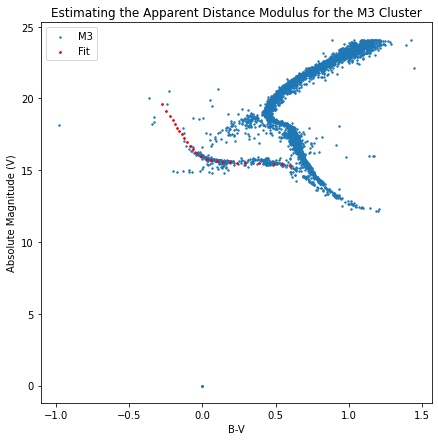

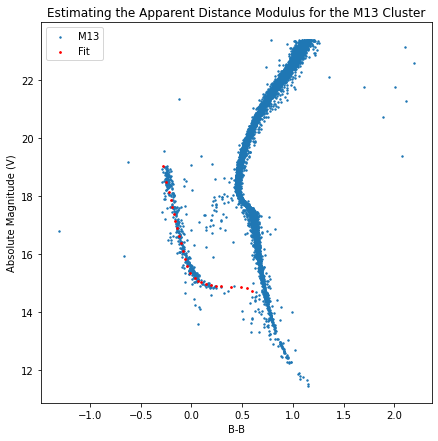

In [47]:
#Plotting CMDs for M3 and M13 with approximated apparent distance moduli using theoretical ZAHB

plt.figure(figsize=(7,7))
plt.title("Estimating the Apparent Distance Modulus for the M3 Cluster")
plt.xlabel('B-V')
plt.ylabel('Absolute Magnitude (V)')
plt.scatter(M3_color,M3_mag,s=2,label='M3')
plt.scatter(ZAHB_color,apparent_dist_mod3,s=3,color='r',label='Fit')
plt.legend()

plt.figure(figsize=(7,7))
plt.title("Estimating the Apparent Distance Modulus for the M13 Cluster")
plt.xlabel('B-B')
plt.ylabel('Absolute Magnitude (V)')
plt.scatter(M13_color,M13_mag,s=2,label='M13')
plt.scatter(ZAHB_color,apparent_dist_mod13,s=3,color='r',label='Fit')
plt.legend()

In [8]:
apparent_dist3  = []    #Apparent distance for M3
apparent_dist13 = []    #Apparent distance for M13

reddening3  = []        #Reddening for M3
reddening13 = []        #Reddening for M13

C = len(ZAHB_color)

for c in range(C):
    reddening3.append(ZAHB_color[c]  + 0.0115)   #0.0115 for M3

for c in range(C):
    reddening13.append(ZAHB_color[c] + 0.0057)   #0.0057 for M13

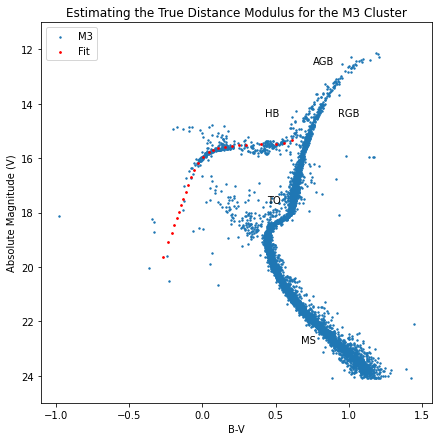

In [45]:
#Plotting CMD for M3 with true distance modulus using reddening
# MS  = Main Sequence
# HB  = Horizontal Branch
# AGB = Asymptotic Giant Branch
# RGB = Red Giant Branch
# TO  = Turn-Off Point

plt.figure(figsize=(7,7))
plt.title("Estimating the True Distance Modulus for the M3 Cluster")
plt.xlabel('B-V')
plt.ylabel('Absolute Magnitude (V)')
plt.gca().invert_yaxis()
plt.ylim(25,11)           #Including a limit that will exclude one outlier
plt.scatter(M3_color,M3_mag,s=2,label='M3')
plt.scatter(reddening3,apparent_dist_mod3,s=3,color='r',label='Fit')
plt.text(M3_color[200],M3_mag[5000],'MS')
plt.text(M3_color[2200],M3_mag[130],'HB')
plt.text(M3_color[100],M3_mag[10],'AGB')
plt.text(M3_color[30],M3_mag[130],'RGB')
plt.text(M3_color[1900],M3_mag[1050],'TO')
plt.legend(loc='upper left')

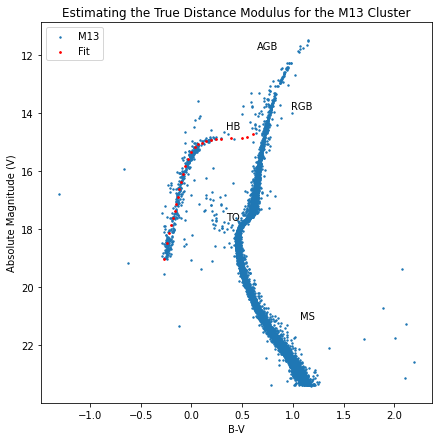

In [44]:
#Plotting CMD for M13 with true distance modulus using reddening
# MS  = Main Sequence
# HB  = Horizontal Branch
# AGB = Asymptotic Giant Branch
# RGB = Red Giant Branch
# TO  = Turn-Off Point

plt.figure(figsize=(7,7))
plt.title("Estimating the True Distance Modulus for the M13 Cluster")
plt.xlabel('B-V')
plt.ylabel('Absolute Magnitude (V)')
plt.gca().invert_yaxis()
plt.scatter(M13_color,M13_mag,s=2,label='M13')
plt.scatter(reddening13,apparent_dist_mod13,s=3,color='r',label='Fit')
plt.text(M13_color[5],M13_mag[5500],'MS')
plt.text(M13_color[7800],M13_mag[200],'HB')
plt.text(M13_color[5000],M13_mag[5],'AGB')
plt.text(M13_color[10],M13_mag[100],'RGB')
plt.text(M13_color[7800],M13_mag[2000],'TO')
plt.legend(loc='upper left')

<h2> Finding the Distances to M3 and M13

<h3> M3

In [42]:
#Apparent distance modulus: 14.95 for M3
#Reddening: 0.0115 for M3

dist3  = 10**((14.95/5)+1)
dist3 /= 1000

print("The distance to M3 is {:.3f} kpc".format(dist3))

The distance to M3 is 9.772 kpc


<h3> M13

In [43]:
#Apparent distance modulus: 14.34 for M13
#Reddening: 0.0057 for M13

dist13  = 10**((14.34/5)+1)
dist13 /= 1000

print("The distance to M13 is {:.3f} kpc".format(dist13))

The distance to M13 is 7.379 kpc
